# Plotting and Visualization
Source: http://nbviewer.jupyter.org/urls/gist.github.com/fonnesbeck/5850463/raw/a29d9ffb863bfab09ff6c1fc853e1d5bf69fe3e4/3.+Plotting+and+Visualization.ipynb

In [42]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import sqrt, log, log2

# set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

### Matplotlib

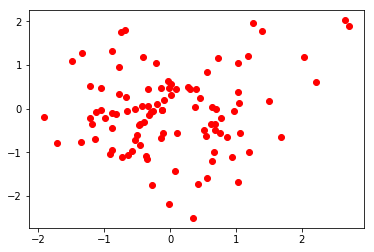

In [10]:
plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'ro')

NameError: name 'ax1' is not defined

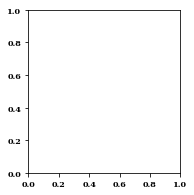

In [7]:
with mpl.rc_context(rc={'font.family':'serif', 'font.weight':'bold','font.size':8}):
    fig = plt.figure(figsize=(6,3))
    axl = fig.add_subplot(121)
    ax1.set_xlabel('some random numbers')
    ax1.set_ylabel('some random numbers')
    ax1.set_title('Random scatterplot')
    plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
    ax2 = fig.add_subplot(122)
    ax2.set_xlabel('sample')
    ax2.set_ylabel('Normal distribution')
    plt.tight_layout()
    plt.savfig('Data/normalvar.png', dpi=150)

### Plotting in Pandas

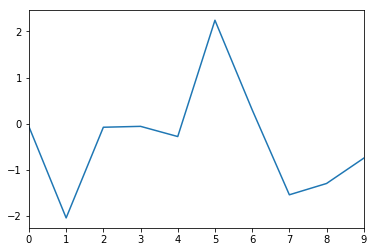

In [8]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

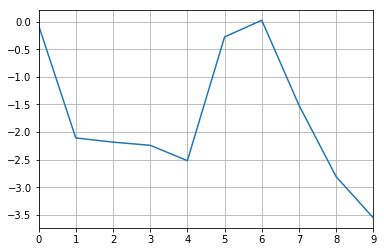

In [9]:
normals.cumsum().plot(grid=True)

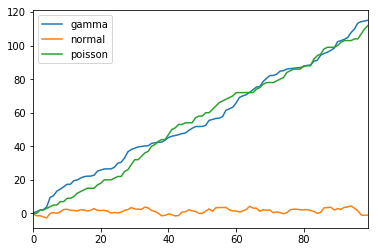

In [11]:
variables = pd.DataFrame({'normal':np.random.normal(size=100),
                          'gamma': np.random.gamma(1, size=100),
                          'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bc1fe10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11bd8fb70>], dtype=object)

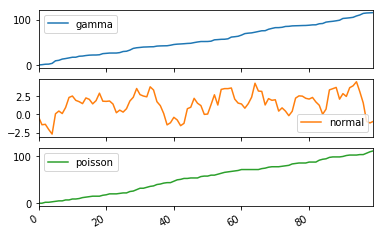

In [12]:
variables.cumsum().plot(subplots=True)

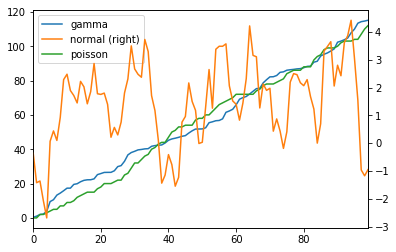

In [15]:
variables.cumsum(0).plot(secondary_y='normal')

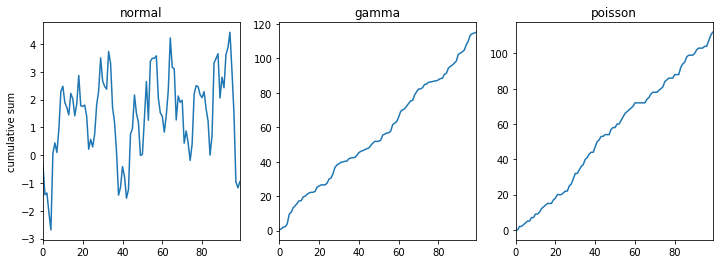

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for i, var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

### Barplots

In [19]:
titanic = pd.read_excel('data/titanic.xls', 'titanic')
titanic.head()

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

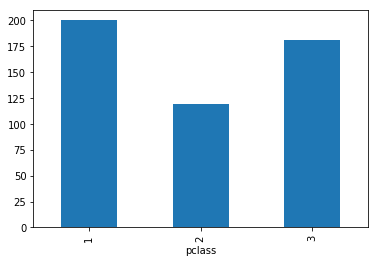

In [20]:
titanic.groupby('pclass').survived.sum().plot(kind='bar')

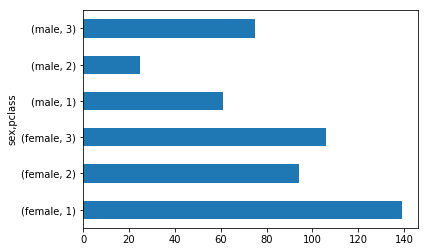

In [21]:
titanic.groupby(['sex','pclass']).survived.sum().plot(kind='barh')

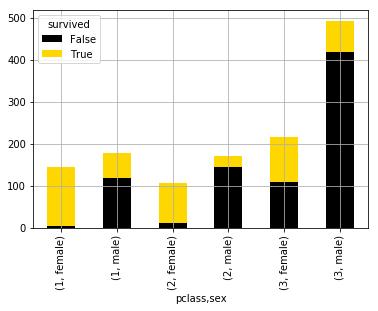

In [27]:
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=True)

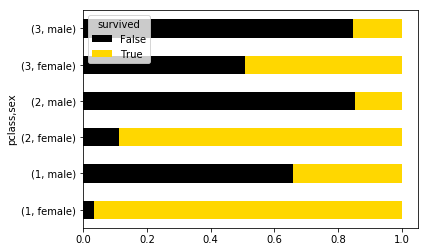

In [28]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(
kind='barh', stacked=True, color=['black','gold'])

### Histograms

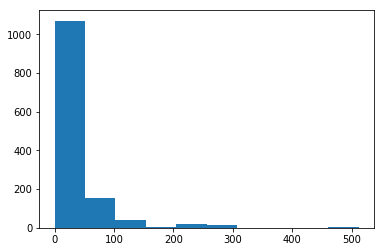

In [29]:
titanic.fare.hist(grid=False)

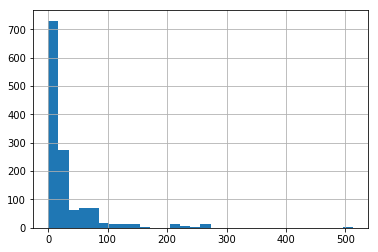

In [30]:
titanic.fare.hist(bins=30)

In [48]:
sturges = lambda n: int(log2(n)+1)
square_root = lambda n: int(sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + log(len(data)) + log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
sturges(n), square_root(n), doanes(titanic.fare.dropna())

(11, 36, 14)

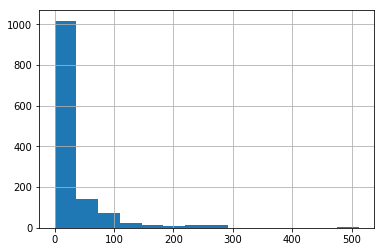

In [49]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()))

A density plot is similar to a histogram in that it describes the distribution of the underlying data, but rather than being a pure empirical representation, it is an estimate of the underlying "true" distribution. As a result, it is smoothed into a continuous line plot. We create them in Pandas using the plot method with kind='kde', where kde stands for kernel density estimate.

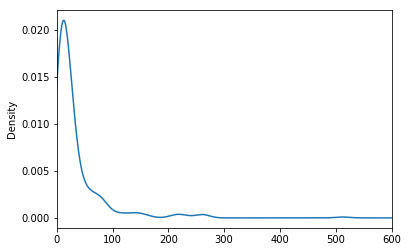

In [50]:
titanic.fare.dropna().plot(kind='kde', xlim=(0,600))

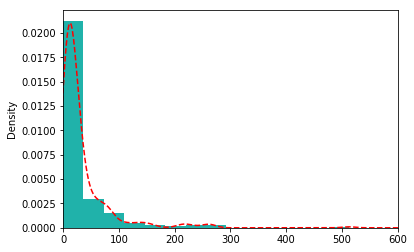

In [51]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()), normed=True, color='lightseagreen')
titanic.fare.dropna().plot(kind='kde', xlim=(0,600), style='r--')

### Boxplot

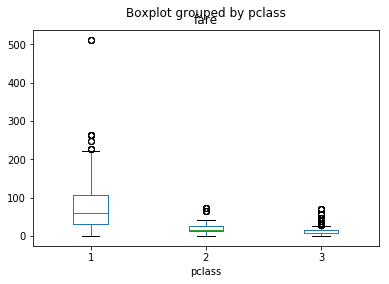

In [52]:
titanic.boxplot(column='fare', by='pclass', grid=False)

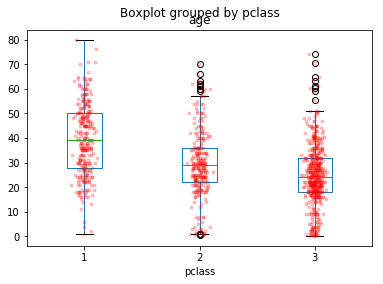

In [67]:
bp = titanic.boxplot(column='age', by='pclass', grid=False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # Add some random 'Jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.2)

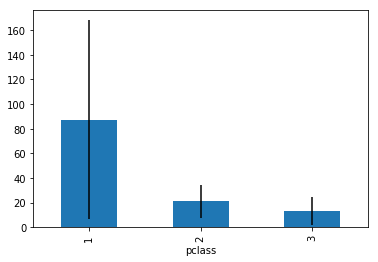

In [68]:
titanic.groupby('pclass')['fare'].mean().plot(kind='bar', yerr=titanic.groupby('pclass')['fare'].std())

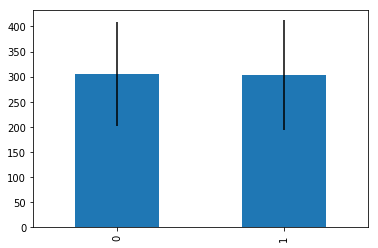

In [72]:
data1 = [150, 155, 175, 200, 245, 255, 395, 300, 305, 320, 375, 400, 420, 430, 440]
data2 = [225, 380]

fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind='bar', yerr=fake_data.std(), grid=False)

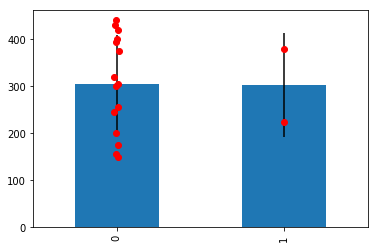

In [74]:
fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind='bar', yerr=fake_data.std(), grid=False)
x1, x2 = p.xaxis.get_majorticklocs()
plt.plot(np.random.normal(x1, 0.01, size=len(data1)), data1,'ro')
plt.plot([x2]*len(data2), data2, 'ro')

In [75]:
baseball = pd.read_csv('data/baseball.csv')
baseball.head()

      id     player  year  stint team  lg   g  ab  r   h  ...   rbi   sb   cs  \
0  88641  womacto01  2006      2  CHN  NL  19  50  6  14  ...   2.0  1.0  1.0   
1  88643  schilcu01  2006      1  BOS  AL  31   2  0   1  ...   0.0  0.0  0.0   
2  88645  myersmi01  2006      1  NYA  AL  62   0  0   0  ...   0.0  0.0  0.0   
3  88649  helliri01  2006      1  MIL  NL  20   3  0   0  ...   0.0  0.0  0.0   
4  88650  johnsra05  2006      1  NYA  AL  33   6  0   1  ...   0.0  0.0  0.0   

   bb   so  ibb  hbp   sh   sf  gidp  
0   4  4.0  0.0  0.0  3.0  0.0   0.0  
1   0  1.0  0.0  0.0  0.0  0.0   0.0  
2   0  0.0  0.0  0.0  0.0  0.0   0.0  
3   0  2.0  0.0  0.0  0.0  0.0   0.0  
4   0  4.0  0.0  0.0  0.0  0.0   0.0  

[5 rows x 23 columns]

(0, 200)

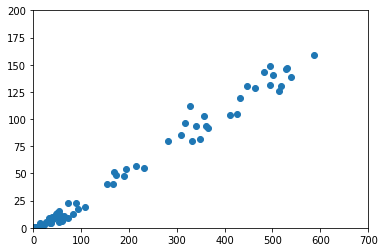

In [78]:
plt.scatter(baseball.ab, baseball.h)
plt.xlim(0,700); plt.ylim(0,200)

(0, 200)

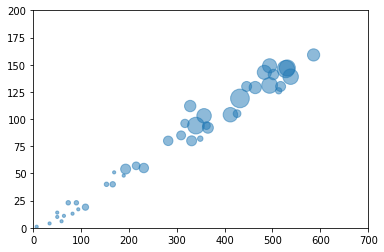

In [79]:
plt.scatter(baseball.ab, baseball.h, s=baseball.hr*10, alpha=0.5)
plt.xlim(0,700); plt.ylim(0,200)

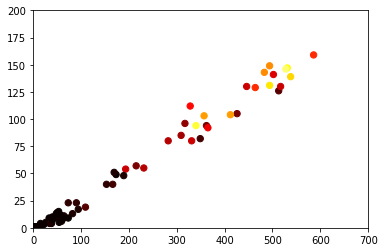

In [80]:
plt.scatter(baseball.ab, baseball.h, c=baseball.hr, s=40, cmap='hot')
plt.xlim(0,700); plt.ylim(0,200);

/Users/Kavi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


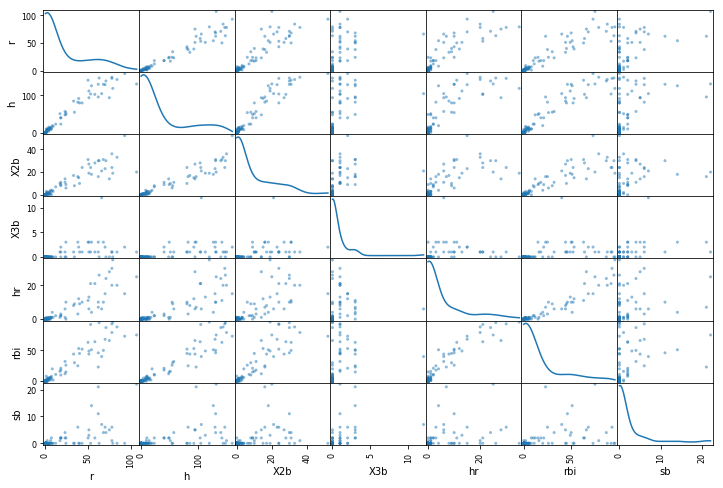

In [83]:
_ = pd.scatter_matrix(baseball.loc[:,'r':'sb'], figsize=(12,8), diagonal='kde')

### Trellis Plots

In [90]:
import pandas.tools.rplot as rplot

titanc = titanic[titanic.age.notnull() & titanic.fare.notnull()]
tp = RPlot(titanic, x='age')
tp.add(TrellisGrid(['pclass','sex']))
tp.add(GeomDensity())
_ = tp.render(gcf())

ModuleNotFoundError: No module named 'pandas.tools.rplot'

In [91]:
cdystonia = pd.read_csv("data/cdystonia.csv", index_col=None)
cdystonia.head()

   patient  obs  week  site  id  treat  age sex  twstrs
0        1    1     0     1   1  5000U   65   F      32
1        1    2     2     1   1  5000U   65   F      30
2        1    3     4     1   1  5000U   65   F      24
3        1    4     8     1   1  5000U   65   F      37
4        1    5    12     1   1  5000U   65   F      39

In [92]:
plt.figure(figsize=(12,12))
bbp = RPlot(cdystonia, x='age', y='twstrs')
bbp.add(TrellisGrid(['week', 'treat']))
bbp.add(GeomScatter())
bbp.add(GeomPolyFit(degree=2))
_ = bbp.render(gcf())

NameError: name 'RPlot' is not defined

In [93]:
cdystonia['site'] = cdystonia.site.astype(float)

In [94]:
plt.figure(figsize=(6,6))
cp = RPlot(cdystonia, x='age', y='twstrs')
cp.add(GeomPoint(colour=ScaleGradient('site', colour1=(1.0, 1.0, 0.5), colour2=(1.0, 0.0, 0.0)),
            size=ScaleSize('week', min_size=10.0, max_size=200.0),
            shape=ScaleShape('treat')))
_ = cp.render(gcf())

NameError: name 'RPlot' is not defined